# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8350 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 0


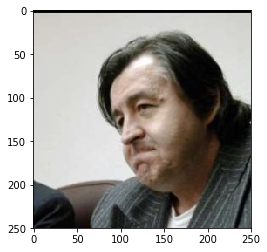

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
Please find answer printed below the following cells.

In [4]:
def count_detected_faces(img_paths):
    """Determines the number of faces detected in the collection of paths provided.
    
    Args:
        img_paths: list of image paths
        
    Returns:
        Count of faces detected across all images in the provided path list
    """
    detected_faces = 0
    for path in img_paths:
        if face_detector(path):
            detected_faces += 1
    return detected_faces

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

print('Detected human faces in human_files_short: {:.2%}'.format(count_detected_faces(human_files_short) / len(human_files_short)))
print('Detected human faces in dog_files_short: {:.2%}'.format(count_detected_faces(dog_files_short) / len(dog_files_short)))

Detected human faces in human_files_short: 97.00%
Detected human faces in dog_files_short: 7.00%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    """Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    """
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    composed = transforms.Compose([transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize])
    im = Image.open(img_path)
    transformed_img = composed(im)
    if use_cuda:
        transformed_img = transformed_img.cuda()
        
    # Additional dimension is inserted in first (0th) position since
    # the model expects the batch size at that position.
    transformed_img = transformed_img.unsqueeze(0)
    predicted = VGG16(transformed_img)
    # Note the '1' indexing done below. This is because the result
    # from topk is a two-item tuple with the second item being a tensor of indices.
    return predicted.topk(1, 1)[1].item()

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    predicted_index = VGG16_predict(img_path)
    return predicted_index >= 151 and predicted_index <= 268

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
Please find the result printed below the cells that follow.

In [9]:
def count_detected_dogs(img_paths):
    """Determines the number of dogs detected in the collection of paths provided.
    
    Args:
        img_paths: list of image paths
        
    Returns:
        Count of dogs detected across all images in the provided path list
    """
    detected_dogs = 0
    for path in img_paths:
        if dog_detector(path):
            detected_dogs += 1
    return detected_dogs

In [10]:
print('Detected dogs in human_files_short: {:.2%}'.format(count_detected_dogs(human_files_short) / len(human_files_short)))
print('Detected dogs in dog_files_short: {:.2%}'.format(count_detected_dogs(dog_files_short) / len(dog_files_short)))

Detected dogs in human_files_short: 1.00%
Detected dogs in dog_files_short: 99.00%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [16]:
import os
from torchvision import datasets

# We don't necessarily know any better, and these aren't to satisfy
# requirements for a pretrained model so starting at 0.5 for all.
normalize = transforms.Normalize((0.5, 0.5, 0.5),
                                 (0.5, 0.5, 0.5))

# Number of samples to load per batch.
batch_size = 20

train_transforms = transforms.Compose([
    # Include some augmentation to the train images.
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    
    # The rest matches what's used for validation/test images.
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])
train_data = datasets.ImageFolder('dogImages/train/', transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

valid_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])
valid_data = datasets.ImageFolder('dogImages/valid/', transform=valid_test_transforms)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)

test_data = datasets.ImageFolder('dogImages/test/', transform=valid_test_transforms)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- I resized all the images to a constant size of 224x224. This was intentional since my CNN convoluation layers made assumptions about the input size (starting at 224 width and height). My understanding is that VGG16 (https://www.quora.com/What-is-the-VGG-neural-network) also requires input images to be of size 224 and I wanted to keep the data loaders as similar as possible across this project.
- The training images were augmented, including some randomized horizontal flipping and rotation. At some point I was struggling to get a high enough test accuracy on my custom model and one of the (many) things I tried was to augment the input training data a bit as suggested by the course videos.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [17]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        out_channels = 64
        image_dims = 7
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.conv1_bn = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.conv2_bn = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.conv3_bn = nn.BatchNorm2d(64)
        self.pool4 = nn.MaxPool2d(4, 4)
        self.pool2 = nn.MaxPool2d(2, 2)
    
        # Define classification layers.
        self.feature_layer_output = image_dims * image_dims * out_channels
        fc_size = 512
        breed_count = 133

        # Keep simple and just have two layers within the fully-connected portion of the model.
        self.fc1 = nn.Linear(self.feature_layer_output, fc_size)
        self.output = nn.Linear(fc_size, breed_count)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        # Feature part of model.
        x = F.relu(self.conv1(x))   # size=224
        x = self.pool4(x)           # size=56
        x = self.conv1_bn(x)
        x = F.relu(self.conv2(x))
        x = self.pool4(x)           # size=14
        x = self.conv2_bn(x)
        x = F.relu(self.conv3(x))
        x = self.pool2(x)           # size=7
        x = self.conv3_bn(x)
        
        # Classification part of model.
        x = x.view(-1, self.feature_layer_output)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.output(x)
        return x

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

1. I started off wanting to model the architecture after VGG-16 which has the nice properties of being fairly straightforward (it's just a "couple" of convolution layers followed by three fully connected layers) and works extremely well. I didn't, however, want to have quite so many layers nor have the complexity of the network (the input to the fully connected layers is of size 4096 and at most 512 filters). Even so, I suspect I started with an overly complex model: three convolution layers that went up to 128 filters and three fully connected layers.
1. The model wasn't making good progress, and the test prediction was less than 1% (terrible!). I made a few tweaks at this point:
  1. Introduced dropout (p=0.2) before and after all fully connected layers.
  1. Added a _fourth_ convolutional layer (now up to 256 filters).
  1. Added some momentum to the SGD optimizer.
1. Despite the changes the model was still not making much progress. I got some suggestion that in this case it's likely that the model is overfitting and I should consider simplifying the model. I made another sweep of changes:
  1. Reduced the number of conv layers to 3.
  1. Reduced the filter sizes, trying out a progression of {16->32->64} instead of as much as 256.
  1. Introduced a max pool layer that reduced the dimensions by a factor of 4 instead of 2. This along with the (2,2) max pool layer got the dims down to 7x7 quickly enough reducing the dimensionality of parameters entering the fully-connected layer.
  1. Updated the data loaders to shuffle data (they weren't before).
  1. Augmented training images to have some random rotation and flipping.
  1. Changed out loss function to CrossEntropyLoss. I suspect there shouldn't have been a difference from what I had before (manually using log softmax in model along with NLLLoss loss function) but I was in the process of making changes so... why not.
  1. Changed out dropout to p=0.25.
1. To my delight, the simpler model trained much quicker (got to over 13% test accuracy in only 12 epochs). Unfortunately, I must admit I'm not sure which specific change (or combination of changes) resulted in the drastic improvement. I suspect the biggest changes came from the reduction in size/complexity of the model.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [18]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(
                valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.813809 	Validation Loss: 4.682469
Validation loss decreased (inf --> 4.682469). Saving model...
Epoch: 2 	Training Loss: 4.527389 	Validation Loss: 4.433936
Validation loss decreased (4.682469 --> 4.433936). Saving model...
Epoch: 3 	Training Loss: 4.257453 	Validation Loss: 4.202386
Validation loss decreased (4.433936 --> 4.202386). Saving model...
Epoch: 4 	Training Loss: 4.061581 	Validation Loss: 4.126152
Validation loss decreased (4.202386 --> 4.126152). Saving model...
Epoch: 5 	Training Loss: 3.889817 	Validation Loss: 3.983858
Validation loss decreased (4.126152 --> 3.983858). Saving model...
Epoch: 6 	Training Loss: 3.746471 	Validation Loss: 3.901520
Validation loss decreased (3.983858 --> 3.901520). Saving model...
Epoch: 7 	Training Loss: 3.615952 	Validation Loss: 3.818341
Validation loss decreased (3.901520 --> 3.818341). Saving model...
Epoch: 8 	Training Loss: 3.475641 	Validation Loss: 3.719552
Validation loss decreased (3.818341 --> 3.719552

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [16]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.354795


Test Accuracy: 22% (187/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [16]:
## Specify appropriate transforms, and batch_sizes
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# Number of samples to load per batch.
batch_size = 20

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])
train_data = datasets.ImageFolder('dogImages/train/', transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

valid_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])
valid_data = datasets.ImageFolder('dogImages/valid/', transform=valid_test_transforms)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)

test_data = datasets.ImageFolder('dogImages/test/', transform=valid_test_transforms)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

data_transfer = {
    'train': train_data,
    'valid': valid_data,
    'test': test_data
}

loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [17]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features
n_classes = 133
last_layer = nn.Linear(n_inputs, n_classes)
model_transfer.classifier[6] = last_layer
print(model_transfer.classifier[6].out_features)

if use_cuda:
    model_transfer = model_transfer.cuda()

133


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

- I chose to use the VGG-16 architecture as a starting point since it's proven to work very well on images, and the dogs we need to classify are included in the set of 1000 classifiable images.
- Since the training set is relatively small (a few thousand) and the images are very similar to what VGG-16 was trained on, it seemed reasonable to use the feature layers as-is and simply train a new output layer (with outputs equal to 133, the number of classes to predict) in the classification portion of the VGG-16 model.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [18]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [19]:
# train the model
n_epochs = 20  # Update to a larger number.
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.479491 	Validation Loss: 0.642493
Validation loss decreased (inf --> 0.642493). Saving model...
Epoch: 2 	Training Loss: 0.591252 	Validation Loss: 0.513690
Validation loss decreased (0.642493 --> 0.513690). Saving model...
Epoch: 3 	Training Loss: 0.439192 	Validation Loss: 0.482801
Validation loss decreased (0.513690 --> 0.482801). Saving model...
Epoch: 4 	Training Loss: 0.359139 	Validation Loss: 0.498843
Epoch: 5 	Training Loss: 0.297673 	Validation Loss: 0.433066
Validation loss decreased (0.482801 --> 0.433066). Saving model...
Epoch: 6 	Training Loss: 0.253935 	Validation Loss: 0.440857
Epoch: 7 	Training Loss: 0.203902 	Validation Loss: 0.405055
Validation loss decreased (0.433066 --> 0.405055). Saving model...
Epoch: 8 	Training Loss: 0.159976 	Validation Loss: 0.434681
Epoch: 9 	Training Loss: 0.147102 	Validation Loss: 0.453774
Epoch: 10 	Training Loss: 0.118090 	Validation Loss: 0.430771
Epoch: 11 	Training Loss: 0.119977 	Validation Loss: 0.4138

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [20]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.503472


Test Accuracy: 87% (734/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [21]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    composed = transforms.Compose([transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize])
    im = Image.open(img_path)
    transformed_img = composed(im)
    if use_cuda:
        transformed_img = transformed_img.cuda()
        
    # Additional dimension is inserted in first (0th) position since
    # the model expects the batch size at that position.
    transformed_img = transformed_img.unsqueeze(0)

    # Classify the image using the modified vgg16
    # (augmented to classify only the 133 dog breeds we care about).
    predicted = model_transfer(transformed_img)

    # Note the '1' indexing done below. This is because the result
    # from topk is a two-item tuple with the second item being a tensor of indices.
    pred = predicted.topk(1, 1)[1].item()
    pred_breed = class_names[pred]
    return pred_breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [22]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    breed = predict_breed_transfer(img_path)
    im_type = 'unknown thing (?!)'
    is_human = face_detector(img_path)
    is_dog = dog_detector(img_path)
    if is_dog:
        im_type = 'dog'
    elif is_human:
        im_type = 'human'
    
    im = Image.open(img_path)
    fig = plt.figure()
    fig.suptitle('This {} looks like a {}'.format(im_type, breed))
    plt.imshow(im)


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output is very interesting. Frankly, I think it does a terrible job assigning dog breeds to pictures of humans. I just can't personally see the similarities in the pictures I've provided :). Having said that, it does a pretty good job with dog pictures and I can even somewhat fool it by providing pictures of pictures of dogs. I provided a picture of a stylized dog image as used in a "Year of the dog" Lunary New Year picture and it did a reasonable job of guessing the dog. I also provided an image of a statue of a dog (so not a real dog... but similar enough) and it guessed quite well. Lastly, I provided a picture of a t-shirt with a doge meme dog picture (it couldn't get the dog likeness correctly, unfortunately).

Points of improvement for algorithm:
1. One of the interesting challenges is that guessing that something is a dog is dependent on the `dog_detector` function. This function, as written, relies on VGG-16 and the classification of items in [ImageNet](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). Notably, this only includes 118 dogs, but our classification is intended to account for up to 133 dogs. This suggests that for 15 of the breeds it's possible the `dog_detector` function will claim there's no dog in the picture. An improvement here would be to explore more comprehensive sources for dog detection. In the absence of using another classification source-of-truth I could perhaps trust my CNN's classification for these dog breeds (from question 4), especially if there's a very high confidence in the output, and if no human face is detected.
1. I currently account for dog or human or (failing that) nothing at all. I don't account for both dogs and humans being in the picture. This could be something to highlight as a way to differentiate some pictures from each other.
1. Some dogs are mixes or may very closely resemble other breeds. It would be interesting to highlight this. Instead of just taking the topk (of 1), perhaps looking at the top two probabilities would be useful and mention in the distinction if they are close to each other.
1. Lastly, I'm still pretty bothered by the fact that the "dog breed resemblance" feature doesn't quite "work". Maybe this can be improved by more training data. Or maybe by adding images of human faces selected for objective resemblance of said breeds =D.

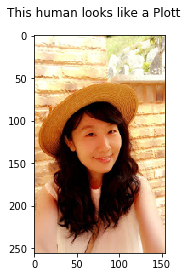

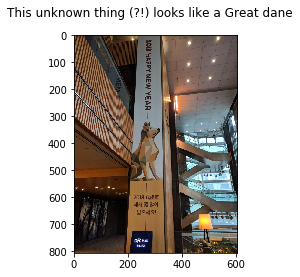

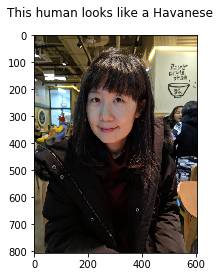

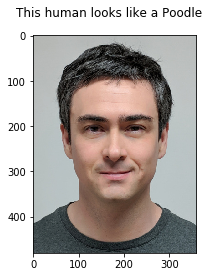

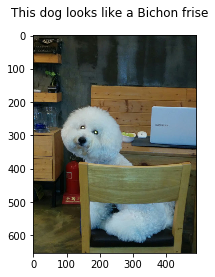

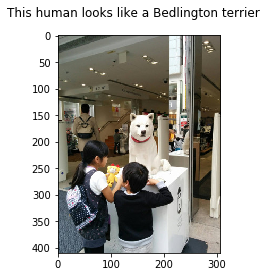

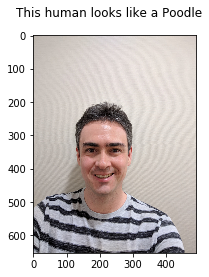

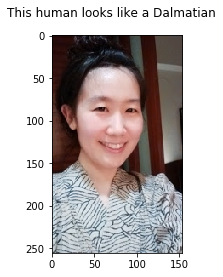

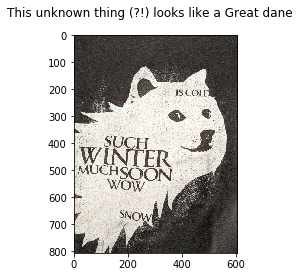

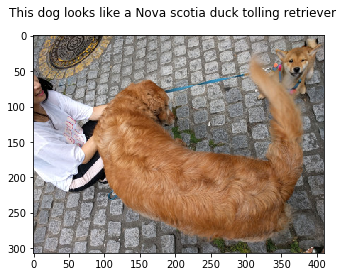

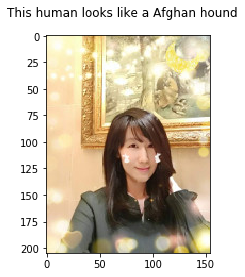

In [23]:
# Load filenames for personally provided files.
my_files = np.array(glob("personal/*"))
for file in my_files:
    run_app(file)